# Predicting Volleyball using Binary Classification
Just like most sports volleyball is filled to brim with stastical categories to track the actions that occur across competitions. With how vast these statistics can be to track the actions occuring during games, its possible to use these statitcs of two teams during matches to predict the winner. Over, the course of this notebook we will use simple logistic regression and ensemble methods to perform this task.

In [26]:
#Importing useful tooks
import pandas as pd
import seaborn as sns
import random
import os
import urllib.request as request
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

In [28]:
#Loading the data
#Using os and gitclone code is taken from 17.1.5_SLR_Visualizing_by_Category.ipynb by Brad Sheese
if not os.path.exists('Data-Science-Project-1'):
    ! git clone https://github.com/Jakekougan/Data-Science-Project-1
df = pd.read_csv('/content/Data-Science-Project-1/Mens-Volleyball-PlusLiga-2008-2023.csv')
df

,Date,Team_1,Team_2,T1_Score,T2_Score,T1_Sum,T1_BP,T1_Ratio,T1_Srv_Sum,T1_Srv_Err,...,T2_Rec_Perf,T2_Att_Sum,T2_Att_Err,T2_Att_Blk,T2_Att_Kill,T2_Att_Kill_Perc,T2_Att_Eff,T2_Blk_Sum,T2_Blk_As,Winner
0,"01.10.2022, 14:45",AZS Olsztyn,ZAKSA Kędzierzyn-Koźle,1,3,60.0,17.0,11.0,79.0,18,...,26%,88,7,7,45,51%,35%,14,11,1
1,"30.09.2022, 17:30",Jastrzębski Węgiel,GKS Katowice,3,0,51.0,17.0,27.0,77.0,15,...,20%,91,8,4,43,47%,34%,1,17,0
2,"01.10.2022, 20:30",LUK Lublin,Czarni Radom,2,3,76.0,23.0,35.0,109.0,16,...,18%,128,10,10,63,49%,33%,10,13,1
3,"02.10.2022, 14:45",Warta Zawiercie,PGE Skra Bełchatów,3,2,66.0,16.0,22.0,98.0,21,...,9%,102,9,9,56,54%,37%,7,14,0
4,"03.10.2022, 17:30",BBTS Bielsko-Biała,Cuprum Lubin,1,3,63.0,22.0,17.0,100.0,19,...,22%,109,7,8,58,53%,39%,10,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,"20.03.2010, 17:00",Pamapol Wielton Wieluń,AZS Częstochowa,3,0,50.0,74.0,6.0,11.0,"2,00",...,26,43%,70,9,9,27,39%,7,"2,33",0
2635,"19.03.2010, 18:00",ZAKSA Kędzierzyn-Koźle,AZS Olsztyn,3,0,54.0,74.0,4.0,11.0,"1,33",...,14,22%,80,10,9,28,35%,9,"3,00",0
2636,"20.03.2010, 17:00",PGE Skra Bełchatów,Jadar Radom,3,0,54.0,75.0,5.0,12.0,"1,67",...,11,17%,66,7,8,35,53%,5,"1,67",0
2637,"20.03.2010, 17:00",Asseco Resovia,Projekt Warszawa,3,0,55.0,73.0,8.0,6.0,"2,67",...,16,23%,82,8,6,31,38%,6,"2,00",0


In [3]:
#Preparing the data
indep = []
depen = []
for col in df.columns:
    if col == "Winner":
        depen.append(col)
    elif col == "Date" or col == "Team_1" or col == "Team_2":
        continue
    else:
        indep.append(col)
X = df[indep]
y = df[depen]

#Cleaning the data
percs = ['T2_Rec_Pos', 'T1_Rec_Pos', 'T2_Rec_Perf', 'T2_Att_Kill_Perc', 'T1_Srv_Eff', 'T2_Srv_Eff',	'T2_Att_Eff','T1_Rec_Perf', 'T1_Att_Kill_Perc', 'T1_Att_Eff', 'T2_Att_Sum', 'T1_Att_Sum']
commas = ['T2_Blk_As', 'T1_Blk_As','T1_Srv_Err', 'T2_Srv_Err' ]
for col in df.columns[4:]:
    if col in percs:
       df.loc[:, col] = df.loc[:, col].str.strip('%')
    elif col in commas:
       df.loc[:, col] = df.loc[:, col].str.replace(',', '.')
df[df.columns[4:]] = df.loc[:, df.columns[4:]].astype(float)
db = df.copy()
df = df.drop(df.columns[:3], axis=1)
df = df.drop(["T1_Sum", "T2_Sum", "T1_Ratio", "T2_Ratio", "T1_Score", "T2_Score"], axis=1)












In [4]:
#Helper function to get labels for a particular team in a match
def get_team_labels(team_num):
    t1 = []
    t2 = []
    for col in X.columns:
        if 'T1' in col:
            t1.append(col)
        else:
            t2.append(col)

    if team_num == 1:
        return t1
    else:
        return t2



In [5]:
for x in df.columns:
    if x != 'Winner':
        df[x] = df[x].astype(float)
    else:
        continue

X = df
X = X.drop('Winner', axis=1)
#Confirm that the data transformation was successful
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   T1_BP             2639 non-null   float64
 1   T1_Srv_Sum        2639 non-null   float64
 2   T1_Srv_Err        2639 non-null   float64
 3   T1_Srv_Ace        2639 non-null   float64
 4   T1_Srv_Eff        2639 non-null   float64
 5   T1_Rec_Sum        2639 non-null   float64
 6   T1_Rec_Err        2639 non-null   float64
 7   T1_Rec_Pos        2639 non-null   float64
 8   T1_Rec_Perf       2639 non-null   float64
 9   T1_Att_Sum        2639 non-null   float64
 10  T1_Att_Err        2639 non-null   float64
 11  T1_Att_Blk        2639 non-null   float64
 12  T1_Att_Kill       2639 non-null   float64
 13  T1_Att_Kill_Perc  2639 non-null   float64
 14  T1_Att_Eff        2639 non-null   float64
 15  T1_Blk_Sum        2639 non-null   float64
 16  T1_Blk_As         2639 non-null   float64


# Explaratory Analysis
After cleaning up the data i wanted to see how certain statistical categories relate to each other. Thankfully it is nice and easy thanks to pandas.

In [6]:
#Analyzing correlations between predictors and target category
df.corr().T.tail(17)

,T1_BP,T1_Srv_Sum,T1_Srv_Err,T1_Srv_Ace,T1_Srv_Eff,T1_Rec_Sum,T1_Rec_Err,T1_Rec_Pos,T1_Rec_Perf,T1_Att_Sum,...,T2_Rec_Perf,T2_Att_Sum,T2_Att_Err,T2_Att_Blk,T2_Att_Kill,T2_Att_Kill_Perc,T2_Att_Eff,T2_Blk_Sum,T2_Blk_As,Winner
T2_Srv_Sum,-0.802709,0.974854,0.948390,-0.832354,-0.770411,0.959961,-0.763857,-0.157723,0.136987,0.949060,...,0.112114,0.945312,-0.835943,0.100316,0.971113,0.190409,-0.499096,0.005929,0.828315,0.064320
T2_Srv_Err,-0.813174,0.949272,0.918412,-0.820145,-0.706815,0.891251,-0.765062,-0.173215,0.117252,0.890949,...,0.056079,0.911784,-0.839527,0.083815,0.924037,0.115993,-0.518878,-0.044173,0.775175,0.038557
T2_Srv_Ace,0.983751,-0.855806,-0.851006,0.932454,0.741080,-0.790372,0.889762,0.159802,0.023943,-0.827174,...,0.105438,-0.836035,0.974087,0.133689,-0.806947,0.174247,0.495485,0.196074,-0.732134,-0.091137
T2_Srv_Eff,0.751849,-0.786585,-0.729266,0.717212,0.635989,-0.701995,0.686981,0.061757,-0.169227,-0.729480,...,-0.082476,-0.772587,0.733183,-0.068191,-0.736468,-0.074398,0.488598,0.069986,-0.638066,-0.036276
T2_Rec_Sum,-0.715938,0.960029,0.898468,-0.779226,-0.683527,0.927376,-0.718187,-0.117805,0.156121,0.911533,...,0.061626,0.902235,-0.775879,0.191573,0.938428,0.157299,-0.592625,-0.027796,0.780088,-0.071972
T2_Rec_Err,0.917529,-0.771200,-0.785678,0.890910,0.698395,-0.713498,0.875842,0.221700,0.130080,-0.731076,...,0.298926,-0.698306,0.927060,0.176807,-0.726825,0.250788,0.468613,0.236724,-0.651770,-0.042862
T2_Rec_Pos,0.107948,-0.159721,-0.179968,0.197174,0.054579,-0.114519,0.257165,0.214458,0.210344,-0.091979,...,0.561519,0.019819,0.194170,0.030885,-0.124172,0.176000,0.216754,0.151329,-0.087496,0.218606
T2_Rec_Perf,0.105686,0.081021,0.057308,0.095300,-0.112330,0.128105,0.168887,0.145387,0.538538,0.170012,...,1.000000,0.264994,0.125833,0.228761,0.138119,0.447007,0.005835,0.210655,0.075033,0.059578
T2_Att_Sum,-0.793922,0.947076,0.891031,-0.799921,-0.717443,0.914304,-0.722864,-0.096748,0.226387,0.952470,...,0.264994,1.000000,-0.811318,0.138041,0.939887,0.130512,-0.524119,-0.001020,0.828109,0.062193
T2_Att_Err,0.962713,-0.842228,-0.853317,0.958144,0.747578,-0.768199,0.903416,0.140509,0.061375,-0.819739,...,0.125833,-0.811318,1.000000,0.142275,-0.799033,0.235219,0.485343,0.246763,-0.707239,-0.002602


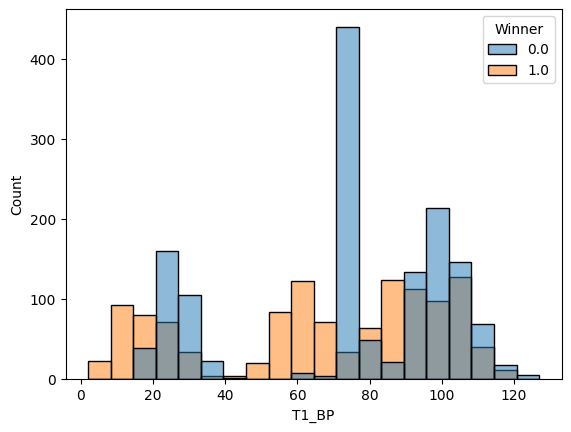

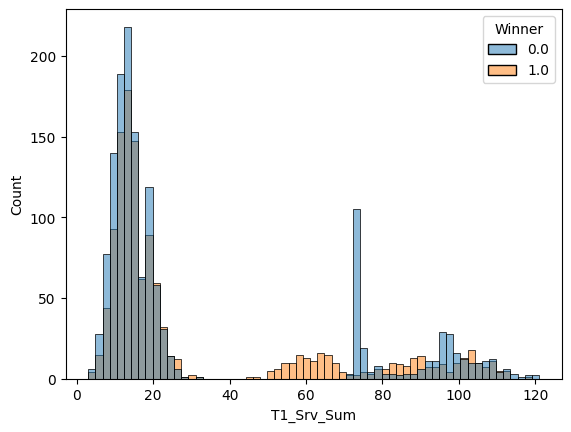

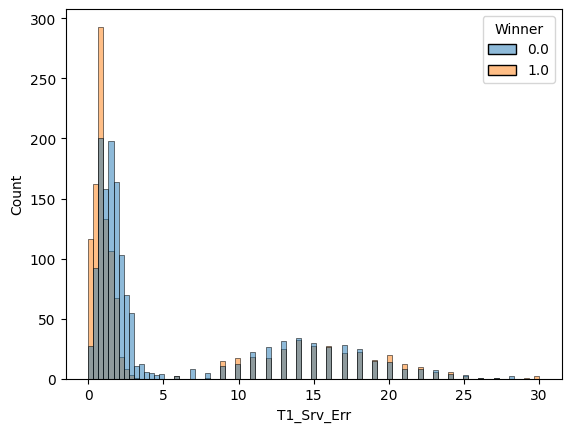

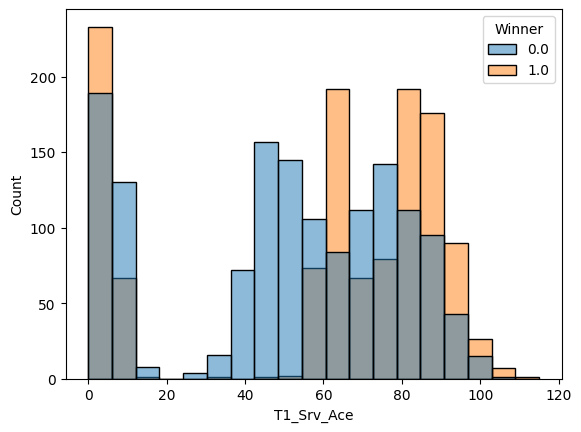

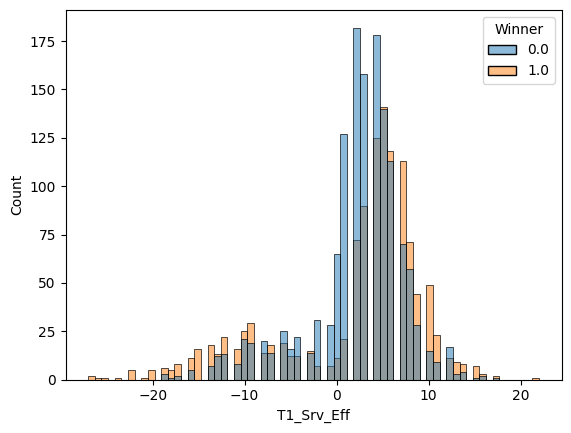

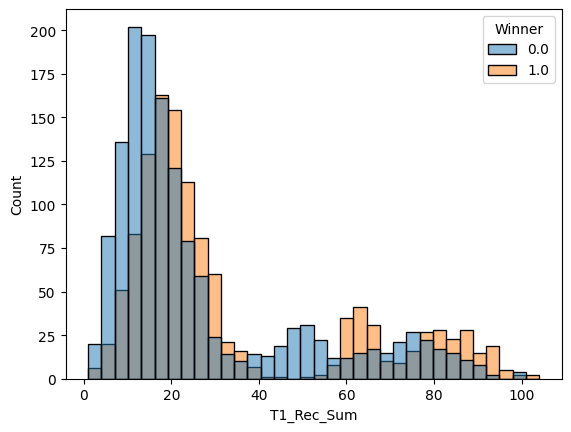

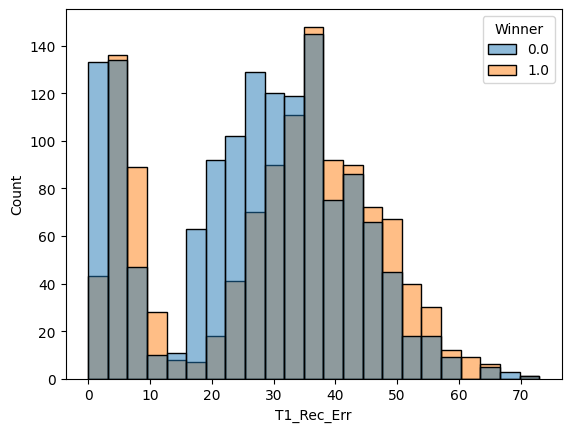

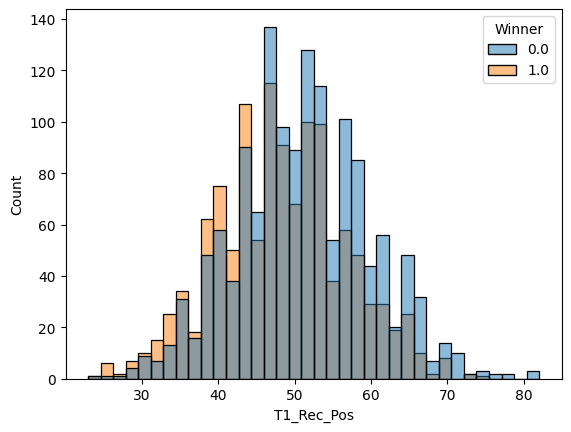

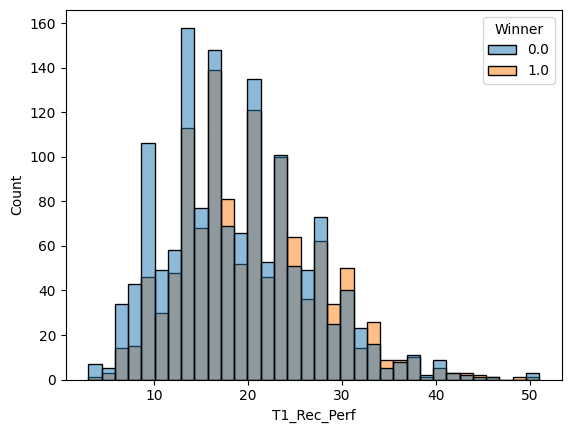

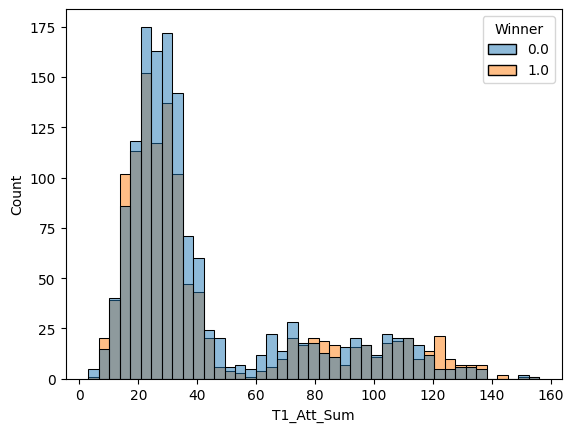

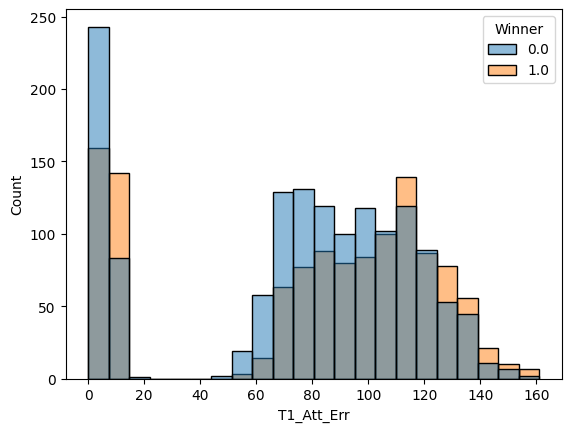

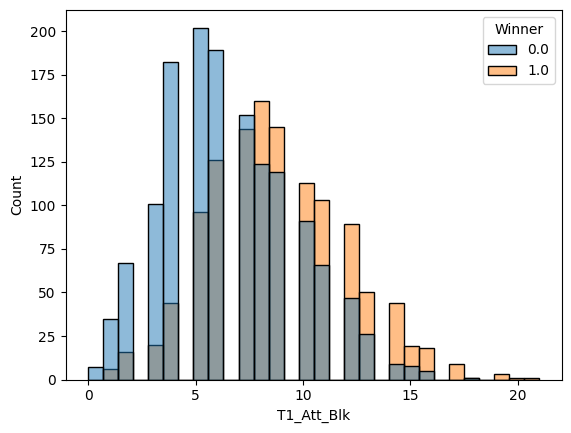

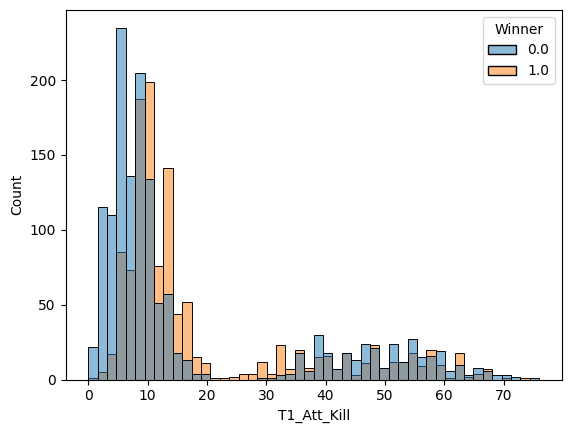

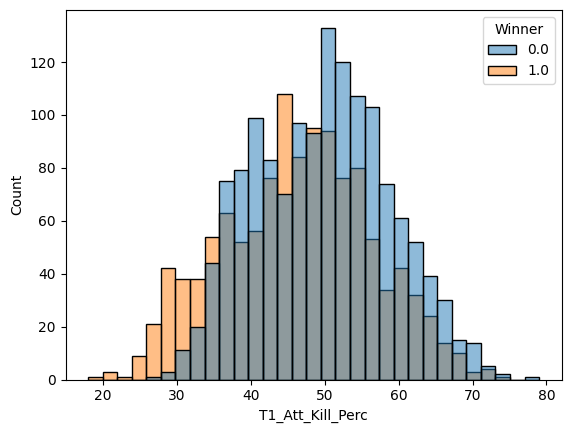

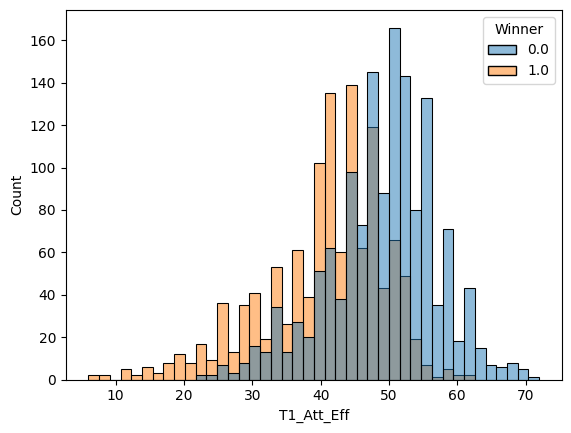

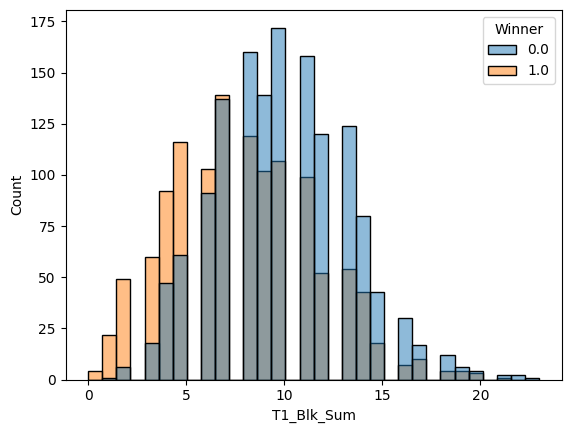

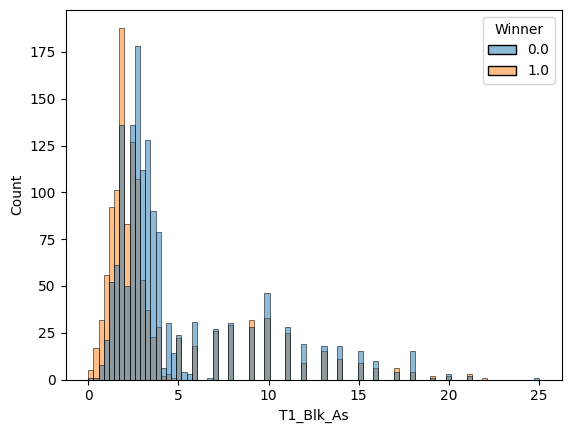

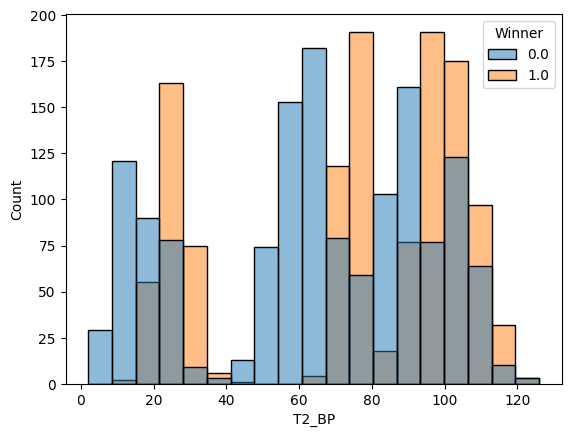

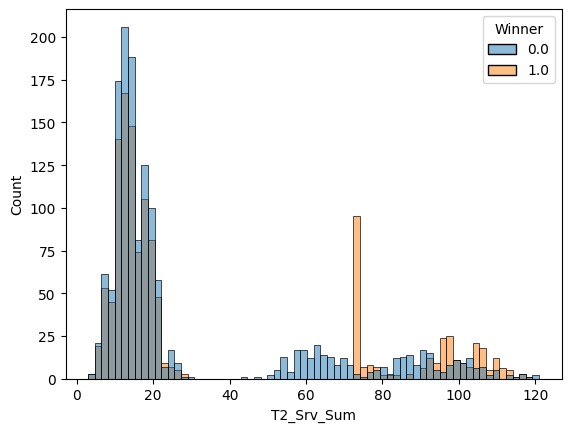

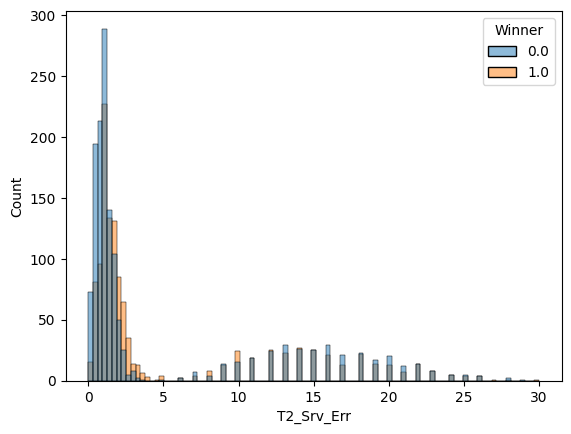

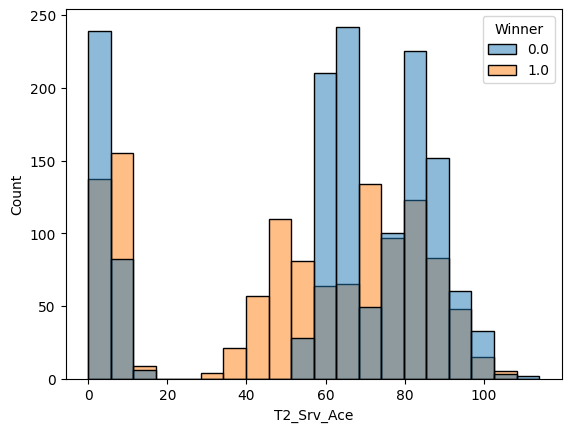

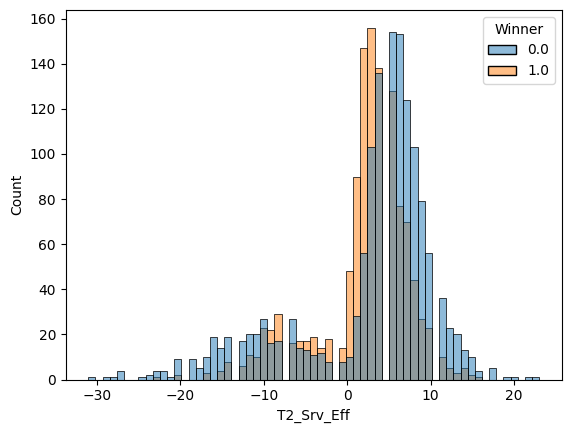

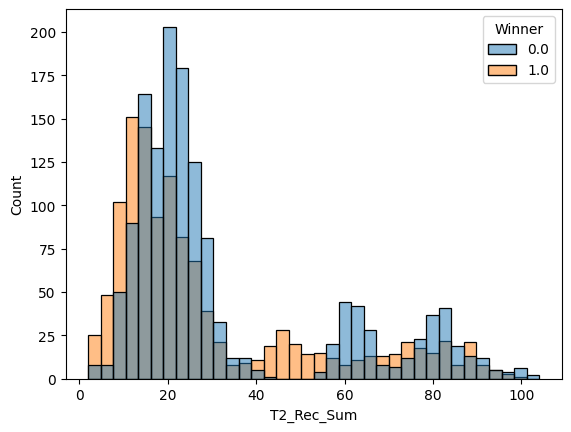

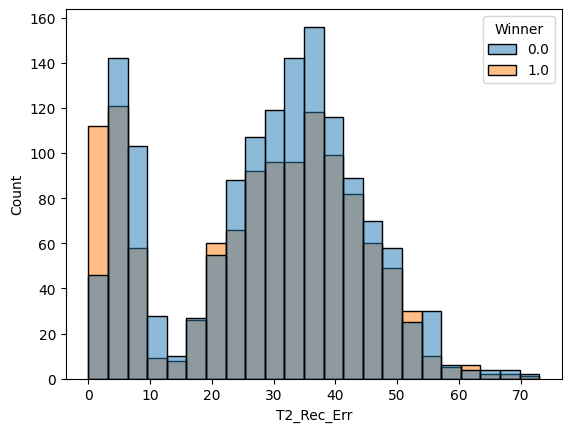

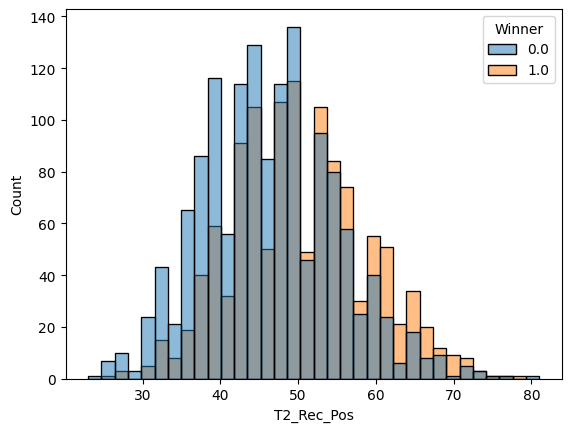

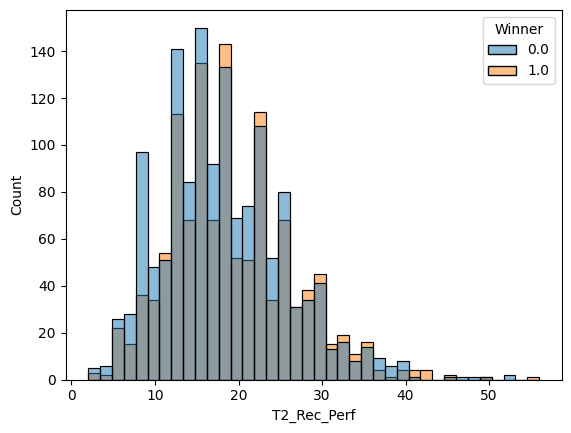

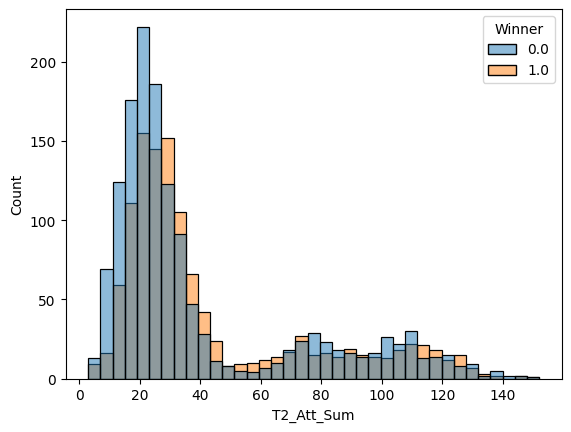

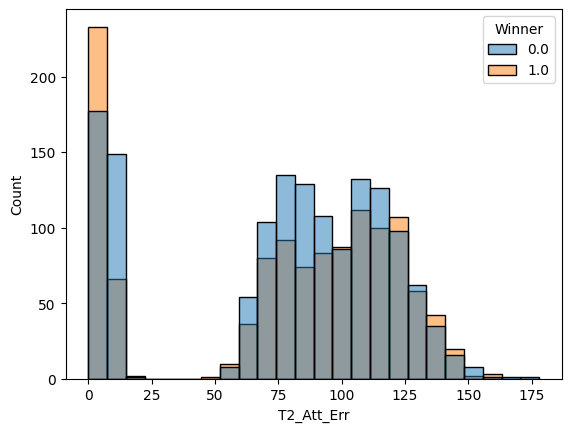

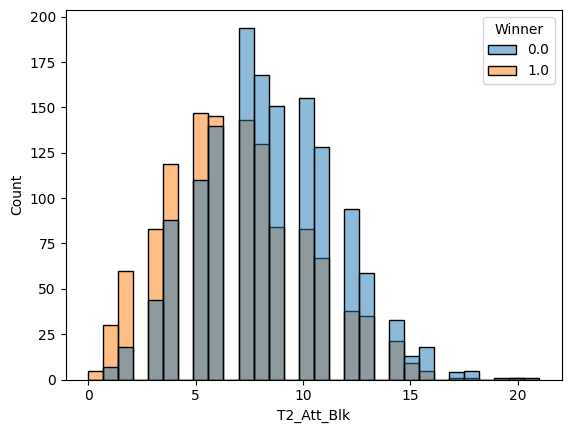

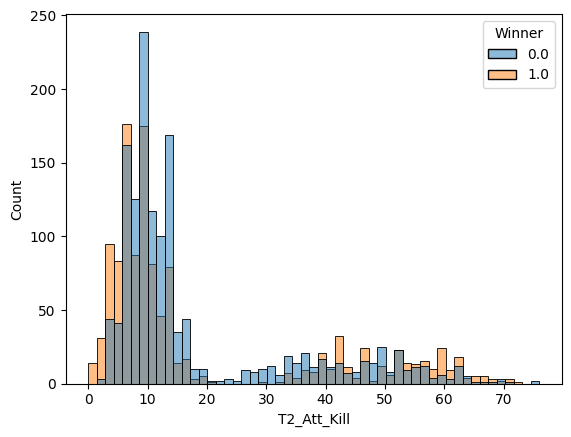

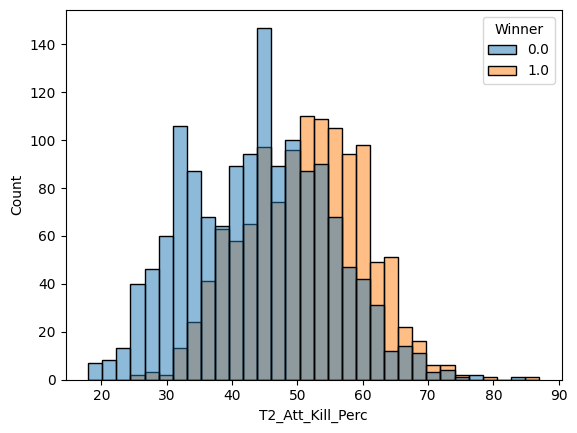

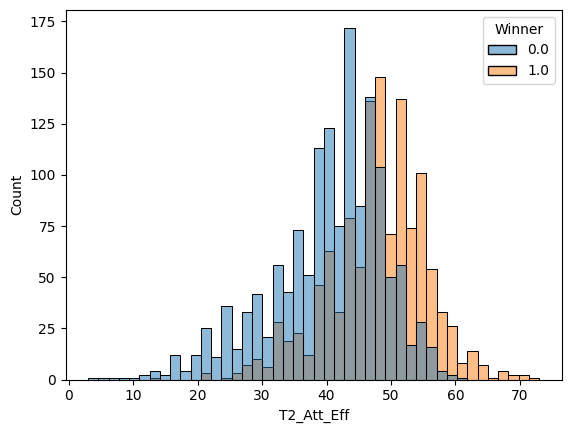

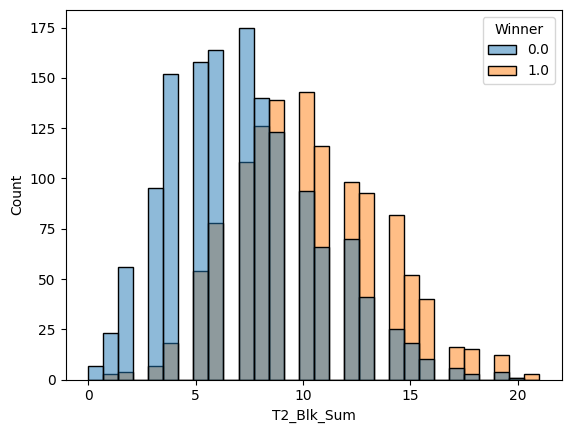

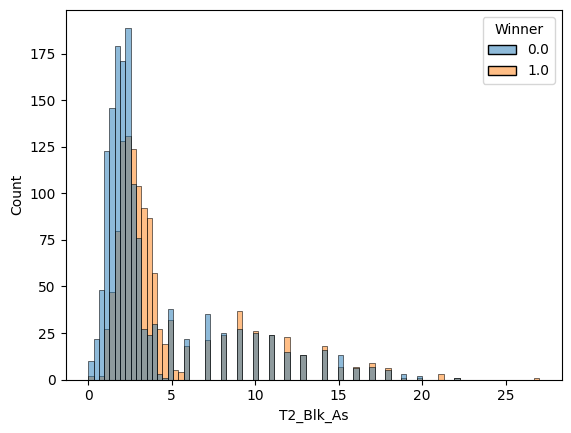

In [7]:
#Testing the correlations of predictors against the target variable in a graph
columns = list(X.columns)
columns.reverse()
for d in X.columns:
    sns.histplot(x=d, hue='Winner', data=df)
    plt.show()

Given the graphs and the correlation chart we can see that certain statitical categories are correlated with each other


*   As a team's serving efficiency increases their opponents attack efficiency decreases
*   As a team's serve efficiency increases the number of recieve errors increases



# Time to Begin working with a model
We will first do a a simple test train split using the validation set approach of cross validation. I am scaling my values as advised by warnings from scikit.

In [19]:
#Getting the data split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)


#Transforming data thanks to scikit learns preprocessing tools  https://scikit-learn.org/stable/modules/preprocessing.html
scaler = preprocessing.StandardScaler().fit(X_train)
scaler_test = preprocessing.StandardScaler().fit(X_test)
X_test_scaled = scaler_test.transform(X_test)
X_scaled = scaler.transform(X_train)


1320
1320


# Using a model
We will use one of sci-kit learns logistic regression models to help perform our analysis and generate predictions to test the model with.

In [20]:
model = LogisticRegression()
model.fit(X_scaled, y_train.values.ravel())
predictions = model.predict(X_test_scaled)
print(classification_report(y_test.values, predictions))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       715
           1       0.88      0.89      0.88       605

    accuracy                           0.89      1320
   macro avg       0.89      0.89      0.89      1320
weighted avg       0.89      0.89      0.89      1320



In [10]:
# Extract the coefficients, code from copilot
coefficients = pd.DataFrame({ 'Feature': X.columns, 'Coefficient': model.coef_[0] })
# Sort by absolute value of the coefficient
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

coefficients.head()

,Feature,Coefficient,Abs_Coefficient
6,T1_Rec_Err,2.125388,2.125388
17,T2_BP,1.609987,1.609987
3,T1_Srv_Ace,1.416855,1.416855
26,T2_Att_Sum,1.325421,1.325421
31,T2_Att_Eff,1.308821,1.308821


# Analysis
From looking at the coefficients from the model we can conclude the follow:

The most impactful statistics on determining wins:


1.   Attack Efficiency
2.   Opponent Recieve Error
3.   Points scored from siding out
4.   Service Aces
5.   Total Blocks



# Predicting DIvision III Men's Volleyball

As a fun way to test inference I thought it would be cool to take stats from IWUMVB matches and random stats from teams within my downloaded dataset, throw them into the trained model and have it predict who would win in a match to further test both models.

In [11]:
#Here are the trained models
model




LogisticRegression()

First i thought it would be fun to have it predict who games IWU played against teams in the USA as we have a truth value to compare to the models prediction.

The two matches i chose both took place in the Shirk Center. The first on February 3rd, 2024 in the Shirk Center against Aurora University where IWU won 3 sets to 0. The second being on February 10th 2024 against Edgewood College where they won 3 sets to 2. The number of sets won does not matter to the model. The only thing it should care about is which team won.

In [12]:
labels = X.columns
numbers_iwu = [38, 	74, 	11, 	6, 	51.4, 47, 	5, 	53.2, 8.5, 	83, 	5, 	20, 	40,  48.2, 	42.2, 	4, 	7]
numbers_au = [ 21, 	59, 	12, 	5, 	35.6, 	63, 	6, 	50.8, 24.1, 	81, 	12, 	31, 	29, 	35.8, 	21.0, 	6, 	2]

numbers_iwu2 = [64, 102, 17, 4, 37.3, 99, 10, 54.5, 19.2, 170, 16, 21, 55, 32.4, 23.0, 7, 6]
numbers_ewc = [64, 114, 15, 10, 35.6, 85, 4, 45.9, 13.0, 142, 18, 15, 47, 33.1, 20.4, 15, 6]

numbers2 = numbers_iwu2 + numbers_ewc
numbers = numbers_iwu + numbers_au


iwu_df = pd.DataFrame(columns=labels)
iwu_df.loc[0] = numbers

y_hat = model.predict(iwu_df.values)

print(y_hat)



iwu_df.loc[1] = numbers2


y_hat = model.predict(iwu_df.loc[1].values.reshape(1, -1))

print(y_hat)










[0]
[0]


It seems like our model correctly predicted the outcome of IWU vs Aurora, that is great, but the basic logistic regression model misclassifed IWU as winning against Edgewood although the random forest model predicted the output correctly.

What about IWU vs teams in the PlusLiga. Who does the model think will win that match? Time to find out!



# IWU MVB vs The PlusLiga
Now that we have tested the model on matches from NCAA Division 3 Men's Volleyball, I want to test the model to predict how a match would go between Illinois Wesleyan and teams from the PlusLiga.

Given that these matches occured against different teams with different skill levels evaluating who would win a hypothetical bout with stats from a single game seems unrealistic so i'll take statistics from an entire season and see how the model behaves.

To get the most out of the data we will take a random team from a random year and get cumulative stats from that year by getting the sum from all rows. We will put that data and the cummulative stats from IWU's 2024 season (found in the list named IWU). From there the data will be put into the model and everytime you run the cells you will get the output from a different hypothetical match.

The model will give the following outputs:


0.   IWU Wins
1.   PlusLiga Wins







In [13]:
#Preparing new data for use in the model

#Getting a random team and year from the league
year = random.choice(range(2008, 2024))
teams = list(db['Team_2'].values)
team = random.choice(teams)
team_mask = db.loc[:, 'Team_2'] == team
year_mask = db.loc[:, 'Date'].str.contains(str(year))

#Summing up all the data for our randomly generated year
team_db = db.loc[team_mask & year_mask, :].sum()

#Dropping useless and unnecessary features from the data
team_db = team_db.drop(['Date', 'Team_1', 'Team_2', 'T1_Sum', 'T2_Sum', 'T1_Ratio', 'T2_Ratio', 'Winner', 'T1_Score', 'T2_Score'])
hypo_db = pd.DataFrame(columns=team_db.index)

#Data from IWUMVB 2024 Season
iwu = [920, 1889, 	336, 	123, 	38.9, 	1613, 	120, 	49.2, 16.1, 	2533, 	256, 	204, 	955, 	37.7, 	27.6, 	144, 100]




hypo_db.loc[f"IWU vs {team}"] = iwu + list(team_db.values[17:])


x_hat = hypo_db.values





#Test with our two models
game = model.predict(x_hat)


print(game)


[0]


# Analysis

The model will successfully give a prediction of these hypothetical matches and it seems like from tests that the teams from the Plusliga have IWU Men's Volleyball beat.

There is something to consider when seeing the model output 0. In certain combinations of years and teams there is no data either because that PlusLiga team had not been formed yet or did not compete a suffcient amount or at all so keep that in mind when looking at the output.